Comprar ação sempre que o RSI for menor que 30.

RSI - sigla para Índice de Força Relativa. Serve para rastrear a tendência de preço de um ativo.

Fórmula RSI:
100 - 100 / ( 1 + MediaRetornosPositivos / MediaRetornosNegativos )

In [20]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

pd.options.mode.chained_assignment = None

Escolher ativo

In [21]:
ativo = 'PETR4.SA'

Puxar dados do yfinance

In [22]:
dados_ativo = yf.download(ativo)
#cuidar com ações antigas, pois as vezes elas não possuem volume.

dados_ativo

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872028,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768468,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750624,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744571,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752537,20912640000
...,...,...,...,...,...,...
2023-03-31,24.000000,24.219999,23.209999,23.450001,23.450001,59547800
2023-04-03,24.090000,24.500000,23.799999,24.490000,24.490000,73931200
2023-04-04,24.629999,24.760000,24.100000,24.270000,24.270000,57505700


<AxesSubplot:xlabel='Date'>

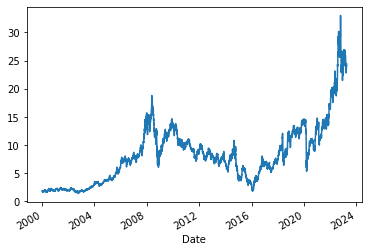

In [23]:
dados_ativo['Adj Close'].plot()

Calcular retornos

In [24]:
dados_ativo['retornos'] = dados_ativo['Adj Close'].pct_change().dropna()

dados_ativo

,Open,High,Low,Close,Adj Close,Volume,retornos
Date,,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872028,35389440000,NaN
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768468,28861440000,-0.055320
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750624,43033600000,-0.010090
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744571,34055680000,-0.003458
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752537,20912640000,0.004566
...,...,...,...,...,...,...,...
2023-03-31,24.000000,24.219999,23.209999,23.450001,23.450001,59547800,-0.021694
2023-04-03,24.090000,24.500000,23.799999,24.490000,24.490000,73931200,0.044350
2023-04-04,24.629999,24.760000,24.100000,24.270000,24.270000,57505700,-0.008983


Separar retornos positivos e negativos

In [25]:
retorno = -1
    
filtrando_retorno = lambda x: x if x > 0 else 0

filtrando_retorno(retorno)

0

In [26]:
dados_ativo['retornos_positivos'] = dados_ativo['retornos'].apply(lambda x : x if x > 0 else 0)
dados_ativo['retornos_negativos'] = dados_ativo['retornos'].apply(lambda x : abs(x) if x < 0 else 0)

dados_ativo

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_positivos,retornos_negativos
Date,,,,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872028,35389440000,NaN,0.000000,0.000000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768468,28861440000,-0.055320,0.000000,0.055320
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750624,43033600000,-0.010090,0.000000,0.010090
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744571,34055680000,-0.003458,0.000000,0.003458
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752537,20912640000,0.004566,0.004566,0.000000
...,...,...,...,...,...,...,...,...,...
2023-03-31,24.000000,24.219999,23.209999,23.450001,23.450001,59547800,-0.021694,0.000000,0.021694
2023-04-03,24.090000,24.500000,23.799999,24.490000,24.490000,73931200,0.044350,0.044350,0.000000
2023-04-04,24.629999,24.760000,24.100000,24.270000,24.270000,57505700,-0.008983,0.000000,0.008983


Calcular a média de retornos positivos e negativos dos últimos 22 dias

In [27]:
dados_ativo['media_retornos_positivos'] = dados_ativo['retornos_positivos'].rolling(window = 22).mean()
dados_ativo['media_retornos_negativos'] = dados_ativo['retornos_negativos'].rolling(window = 22).mean()

dados_ativo = dados_ativo.dropna()
dados_ativo

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_positivos,retornos_negativos,media_retornos_positivos,media_retornos_negativos
Date,,,,,,,,,,,
2000-02-01,5.200000,5.200000,5.200000,5.200000,1.656944,23672320000,0.019408,0.019408,0.000000,0.003489,0.008878
2000-02-02,5.300000,5.300000,5.300000,5.300000,1.688808,14272000000,0.019231,0.019231,0.000000,0.004363,0.008878
2000-02-03,5.450000,5.450000,5.450000,5.450000,1.736605,25950720000,0.028302,0.028302,0.000000,0.005650,0.006364
2000-02-04,5.588000,5.588000,5.588000,5.588000,1.780577,21199360000,0.025321,0.025321,0.000000,0.006800,0.005905
2000-02-07,5.625000,5.625000,5.625000,5.625000,1.792367,20613120000,0.006622,0.006622,0.000000,0.007101,0.005748
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,24.000000,24.219999,23.209999,23.450001,23.450001,59547800,-0.021694,0.000000,0.021694,0.006727,0.009982
2023-04-03,24.090000,24.500000,23.799999,24.490000,24.490000,73931200,0.044350,0.044350,0.000000,0.008743,0.008796
2023-04-04,24.629999,24.760000,24.100000,24.270000,24.270000,57505700,-0.008983,0.000000,0.008983,0.006788,0.009204


Calcular RSI

In [28]:
dados_ativo['RSI'] = (100 - 100 / (1 + dados_ativo['media_retornos_positivos'] / dados_ativo['media_retornos_negativos']))

dados_ativo.head(50)

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_positivos,retornos_negativos,media_retornos_positivos,media_retornos_negativos,RSI
Date,,,,,,,,,,,,
2000-02-01,5.200,5.200,5.200,5.200,1.656944,23672320000,0.019408,0.019408,0.000000,0.003489,0.008878,28.210997
2000-02-02,5.300,5.300,5.300,5.300,1.688808,14272000000,0.019231,0.019231,0.000000,0.004363,0.008878,32.950054
2000-02-03,5.450,5.450,5.450,5.450,1.736605,25950720000,0.028302,0.028302,0.000000,0.005650,0.006364,47.026900
2000-02-04,5.588,5.588,5.588,5.588,1.780577,21199360000,0.025321,0.025321,0.000000,0.006800,0.005905,53.522972
2000-02-07,5.625,5.625,5.625,5.625,1.792367,20613120000,0.006622,0.006622,0.000000,0.007101,0.005748,55.266316
2000-02-08,5.750,5.750,5.750,5.750,1.832197,31498240000,0.022222,0.022222,0.000000,0.007904,0.005748,57.895978
2000-02-09,5.625,5.625,5.625,5.625,1.792367,15600640000,-0.021739,0.000000,0.021739,0.006970,0.006736,50.853356
2000-02-10,5.463,5.463,5.463,5.463,1.740746,18600960000,-0.028800,0.000000,0.028800,0.006970,0.006928,50.152313
2000-02-11,5.288,5.288,5.288,5.288,1.684984,25297920000,-0.032033,0.000000,0.032033,0.006904,0.008384,45.159023


Sinais de compra ou venda

In [29]:
dados_ativo.loc[dados_ativo['RSI'] < 30, 'Compra'] = 'sim'
dados_ativo.loc[dados_ativo['RSI'] > 30, 'Compra'] = 'não'

dados_ativo

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_positivos,retornos_negativos,media_retornos_positivos,media_retornos_negativos,RSI,Compra
Date,,,,,,,,,,,,,
2000-02-01,5.200000,5.200000,5.200000,5.200000,1.656944,23672320000,0.019408,0.019408,0.000000,0.003489,0.008878,28.210997,sim
2000-02-02,5.300000,5.300000,5.300000,5.300000,1.688808,14272000000,0.019231,0.019231,0.000000,0.004363,0.008878,32.950054,não
2000-02-03,5.450000,5.450000,5.450000,5.450000,1.736605,25950720000,0.028302,0.028302,0.000000,0.005650,0.006364,47.026900,não
2000-02-04,5.588000,5.588000,5.588000,5.588000,1.780577,21199360000,0.025321,0.025321,0.000000,0.006800,0.005905,53.522972,não
2000-02-07,5.625000,5.625000,5.625000,5.625000,1.792367,20613120000,0.006622,0.006622,0.000000,0.007101,0.005748,55.266316,não
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,24.000000,24.219999,23.209999,23.450001,23.450001,59547800,-0.021694,0.000000,0.021694,0.006727,0.009982,40.261543,não
2023-04-03,24.090000,24.500000,23.799999,24.490000,24.490000,73931200,0.044350,0.044350,0.000000,0.008743,0.008796,49.849657,não
2023-04-04,24.629999,24.760000,24.100000,24.270000,24.270000,57505700,-0.008983,0.000000,0.008983,0.006788,0.009204,42.444676,não


In [38]:
data_compra = []
data_venda = []

for i in range(len(dados_ativo)):
    print(i)
    
    if 'sim' in dados_ativo['Compra'].iloc[i]:
        data_compra.append(dados_ativo.iloc[i + 1].name)
        
data_compra

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406


4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333


[Timestamp('2000-02-02 00:00:00'),
 Timestamp('2000-08-04 00:00:00'),
 Timestamp('2000-12-07 00:00:00'),
 Timestamp('2000-12-08 00:00:00'),
 Timestamp('2000-12-22 00:00:00'),
 Timestamp('2000-12-25 00:00:00'),
 Timestamp('2001-03-19 00:00:00'),
 Timestamp('2001-03-20 00:00:00'),
 Timestamp('2001-03-21 00:00:00'),
 Timestamp('2001-03-23 00:00:00'),
 Timestamp('2001-03-27 00:00:00'),
 Timestamp('2001-04-03 00:00:00'),
 Timestamp('2001-04-04 00:00:00'),
 Timestamp('2001-04-05 00:00:00'),
 Timestamp('2001-07-05 00:00:00'),
 Timestamp('2001-07-06 00:00:00'),
 Timestamp('2001-07-09 00:00:00'),
 Timestamp('2002-06-20 00:00:00'),
 Timestamp('2002-06-21 00:00:00'),
 Timestamp('2002-06-24 00:00:00'),
 Timestamp('2002-06-25 00:00:00'),
 Timestamp('2002-06-26 00:00:00'),
 Timestamp('2002-07-29 00:00:00'),
 Timestamp('2002-07-30 00:00:00'),
 Timestamp('2002-07-31 00:00:00'),
 Timestamp('2002-10-14 00:00:00'),
 Timestamp('2002-10-15 00:00:00'),
 Timestamp('2002-10-16 00:00:00'),
 Timestamp('2002-10-

In [42]:
data_compra = []
data_venda = []

for i in range(len(dados_ativo)):
    
    if 'sim'in dados_ativo['Compra'].iloc[i]:
        
        data_compra.append(dados_ativo.iloc[i + 1].name) # +1 porque a gente compra no preço de abertura do dia seguinte
        
        for j in range(1, 11):
            
            if dados_ativo['RSI'].iloc[i + j] > 40: #vende se nos próx 10 dias o RSI passa de 40
                
                data_venda.append(dados_ativo.iloc[i + j + 1].name) #vende no dia seguinte que bater 40
                break
            
            elif j == 10:
                data_venda.append(dados_ativo.iloc[i + j + 1].name)
            

data_venda

[Timestamp('2000-02-04 00:00:00'),
 Timestamp('2000-08-11 00:00:00'),
 Timestamp('2000-12-15 00:00:00'),
 Timestamp('2000-12-15 00:00:00'),
 Timestamp('2000-12-29 00:00:00'),
 Timestamp('2000-12-29 00:00:00'),
 Timestamp('2001-04-02 00:00:00'),
 Timestamp('2001-04-03 00:00:00'),
 Timestamp('2001-04-04 00:00:00'),
 Timestamp('2001-04-06 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-07-13 00:00:00'),
 Timestamp('2001-07-13 00:00:00'),
 Timestamp('2001-07-13 00:00:00'),
 Timestamp('2002-07-04 00:00:00'),
 Timestamp('2002-07-05 00:00:00'),
 Timestamp('2002-07-08 00:00:00'),
 Timestamp('2002-07-09 00:00:00'),
 Timestamp('2002-07-10 00:00:00'),
 Timestamp('2002-08-05 00:00:00'),
 Timestamp('2002-08-05 00:00:00'),
 Timestamp('2002-08-05 00:00:00'),
 Timestamp('2002-10-21 00:00:00'),
 Timestamp('2002-10-21 00:00:00'),
 Timestamp('2002-10-21 00:00:00'),
 Timestamp('2002-10-

Observando dados de compra ao longo do tempo

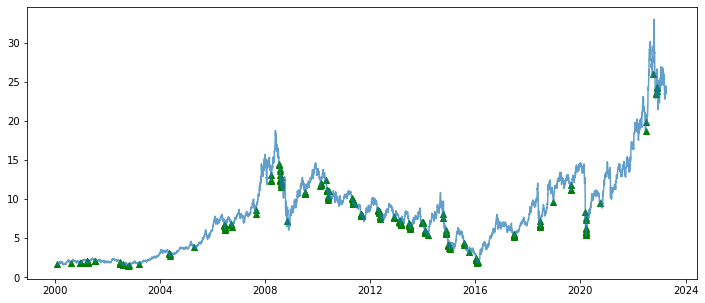

In [46]:
plt.figure(figsize = (12, 5))
plt.scatter(dados_ativo.loc[data_compra].index, dados_ativo.loc[data_compra]['Adj Close'], marker = '^', c = 'g')
plt.plot(dados_ativo['Adj Close'], alpha = 0.7)

Calculando lucros

In [48]:
lucros = dados_ativo.loc[data_venda]['Open'].values/dados_ativo.loc[data_compra]['Open'].values - 1



lucros

array([ 5.43395509e-02,  7.31183124e-02,  5.10998253e-02,  3.52297721e-02,
        2.41610290e-02,  1.73333062e-02, -1.30560927e-01, -1.23781649e-01,
       -6.84104924e-02,  4.76386364e-02,  5.88598601e-02,  1.44605114e-01,
        1.11231136e-01,  5.00000156e-02,  3.25670639e-02,  3.65384909e-02,
        3.25670639e-02, -3.30595603e-02,  1.08225106e-02,  7.12962491e-02,
        2.52796655e-02, -1.04925411e-02,  7.35181707e-02,  6.83544497e-02,
        4.22326257e-02,  9.19219804e-02,  8.43706531e-02,  1.13636361e-01,
        5.86011897e-02,  3.25570074e-02, -5.80002382e-02, -4.60526316e-02,
        1.44769674e-04,  2.11368670e-02,  1.64893942e-02, -4.46818878e-02,
       -1.18061091e-02,  4.90666707e-02,  6.75712831e-02,  7.78082234e-02,
       -6.81647194e-03, -2.86419715e-02, -4.51128567e-02, -5.85210426e-02,
        3.40478795e-02,  3.01507735e-02,  6.56619846e-02,  5.29674913e-02,
        1.27529396e-01,  1.08011377e-01,  8.32167405e-02, -9.50113054e-02,
       -1.54171910e-01, -

Analisando lucros
- qual a média de lucros?
- qual a média de perdas?
- qual a % de operações vencedoras?
- qual expectativa matemática do modelo?
- qual retorno acumulado?
- o retorno acumulado venceu o Buy and Hold na ação?

In [49]:
operacoes_vencedoras = len(lucros[lucros > 0])/len(lucros)
operacoes_vencedoras

0.5836909871244635

In [51]:
media_ganhos = np.mean(lucros[lucros > 0])
media_ganhos * 100

6.902665217758821

In [52]:
media_perdas = abs(np.mean(lucros[lucros < 0]))
media_perdas

0.05939926153741871

In [54]:
expectativa_mat_modelo = (operacoes_vencedoras * media_ganhos) - ((1 - operacoes_vencedoras) * media_perdas)
expectativa_mat_modelo * 100

1.5561786811254852

In [56]:
performance_acumulada = (np.cumprod(1 + lucros) - 1) 
performance_acumulada * 100

array([ 5.43395509e+00,  1.31431080e+01,  1.89247010e+01,  2.31143911e+01,
        2.60889615e+01,  2.82745001e+01,  1.15268625e+01, -2.27811640e+00,
       -8.96331858e+00, -4.62645521e+00,  9.87218289e-01,  1.55904865e+01,
        2.84477477e+01,  3.48701371e+01,  3.92624615e+01,  4.43509016e+01,
        4.90519867e+01,  4.41243936e+01,  4.56841813e+01,  5.60709170e+01,
        6.00163376e+01,  5.83373596e+01,  6.99780326e+01,  8.15967875e+01,
        8.92660967e+01,  1.06663811e+02,  1.24100172e+02,  1.49566100e+02,
        1.64190970e+02,  1.72792238e+02,  1.56970223e+02,  1.45136068e+02,
        1.45171556e+02,  1.50353715e+02,  1.54481896e+02,  1.43111164e+02,
        1.40240967e+02,  1.52028792e+02,  1.69058701e+02,  1.89993680e+02,
        1.88016946e+02,  1.79767573e+02,  1.67146459e+02,  1.51512769e+02,
        1.60076246e+02,  1.67917746e+02,  1.85509757e+02,  2.00632492e+02,
        2.38971972e+02,  2.75584802e+02,  3.06839745e+02,  2.68185370e+02,
        2.11421528e+02,  

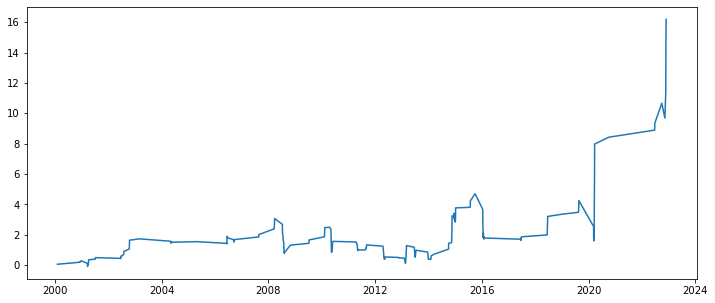

In [57]:
plt.figure(figsize = (12, 5))
plt.plot(data_compra, performance_acumulada)

In [58]:
retorno_buy_and_hold = dados_ativo['Adj Close'].iloc[-1]/dados_ativo['Adj Close'].iloc[0] - 1
retorno_buy_and_hold * 100

1348.4499567644796